## **Analyzing Used Car Listings on eBay Kleinanzeigen**

#### We will be working on a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website. The original [data](https://www.kaggle.com/orgesleka/used-cars-database/data) was scraped and uploaded to Kaggle.

#### Our aim of this project is to **clean, analyze and visualize** the included used car listings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('max_columns',200)

In [2]:
# Let's extract and see some first rows in our dataset
autos = pd.read_csv('autos.csv', encoding='Latin-1')
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

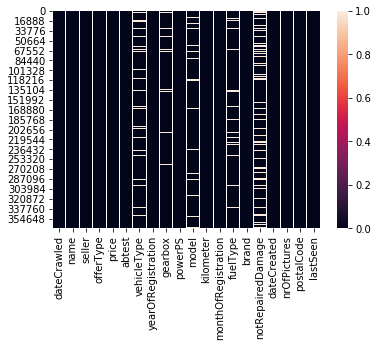

In [4]:
sns.heatmap(autos.isnull())

--> We can see that some of columns have NaN values: **"vehicleType", "gearbox", "model", "fuelType",** and above all is **"notRepairedDamage"** column.

In addition, let's rename column names in the same format.

In [5]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gear_box', 'power_ps', 'model',
       'kilometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']
autos.tail(3)

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21
371527,2016-03-07 19:39:19,BMW_M135i_vollausgestattet_NP_52.720____Euro,privat,Angebot,28990,control,limousine,2013,manuell,320,m_reihe,50000,8,benzin,bmw,nein,2016-03-07 00:00:00,0,73326,2016-03-22 03:17:10


## **CLEANING PROCESS**

### **1. REMOVE INAPPROPRIATE DATA**

In [6]:
autos['price'].describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

In [7]:
autos['price'].value_counts(bins=6)

(-2147483.648, 357913941.167]     371527
(1789569705.83, 2147483647.0]          1
(1431655764.67, 1789569705.83]         0
(1073741823.5, 1431655764.67]          0
(715827882.333, 1073741823.5]          0
(357913941.167, 715827882.333]         0
Name: price, dtype: int64

In [8]:
autos['price'].value_counts().sort_index()[:5]

0    10778
1     1189
2       12
3        8
4        1
Name: price, dtype: int64

#### It seems that there are some rows with car_price=0 (about 3% of our data) as well as car_price>400000 (That's incredibly high).

#### --> **That's why in order to have better analysis, we'll remove those rows from our dataset.**

In [9]:
# Choose only data that have car price from $1 to $351,000
autos = autos[autos['price'].between(1,351000)]
autos['price'].value_counts(bins=6)

(-349.0, 58334.167]         359563
(58334.167, 116667.333]        853
(116667.333, 175000.5]         136
(175000.5, 233333.667]          47
(233333.667, 291666.833]        23
(291666.833, 350000.0]          13
Name: price, dtype: int64

### **2. TRANSFORM OBJECTS INTO DATETIME FORMAT**

In our dataset, there're 3 columns that illustrate the date: **"date_crawled", "ad_created", "last_seen"**.

In [10]:
# Transform objects into datetime format
date_cols = ['date_crawled','ad_created','last_seen']
for col in date_cols:
    autos[col] = pd.to_datetime(autos[col], errors='coerce')

In [11]:
autos.head(3)

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46


In [12]:
autos['exist_day'] = autos['last_seen'] - autos['date_crawled']
def get_day(date):
    return date.days
autos['exist_day'] = autos['exist_day'].apply(get_day)
print('Number of days the item was sold since the crawled day:')
autos['exist_day'].value_counts(ascending=True, normalize=True).sort_index()[:10]

Number of days the item was sold since the crawled day:


-13    0.000003
 0     0.176655
 1     0.081515
 2     0.080785
 3     0.068729
 4     0.043870
 5     0.059501
 6     0.028350
 7     0.054476
 8     0.024188
Name: exist_day, dtype: float64

--> Assuming that last_seen date is the date when the items is sold. We can see that nearly **18% of autos items on ebay is sold within day**. Also, there is ONE data when the last_seen date is before the crawled_date. It's impossible!

*Let's remove that row from our dataset.*

In [13]:
autos = autos[autos['exist_day']>=0]
autos.shape

(360634, 21)

In [14]:
autos['exist_day'].value_counts().sort_index()[:5]

0    63708
1    29397
2    29134
3    24786
4    15821
Name: exist_day, dtype: int64

### **3. REMOVE INVALID REGISTRATION YEAR**

In [15]:
autos['registration_year'].describe()

count    360634.000000
mean       2004.433129
std          81.017089
min        1000.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

--> It seems unreasonable since there is car that was **registered in year 1000**, even before when cars were invented. Also, there is car that was **registered in year 9999**, a long time into the future!

*Let's remove those rows to clean our dataset.*

In [16]:
# Choose only data where registration_year is between 1900 and 2016
autos = autos[autos['registration_year'].between(1900,2016)]
print('Percentage of cars with the appropriate registration year:')
autos['registration_year'].value_counts(normalize=True)[:10]*100

Percentage of cars with the appropriate registration year:


2000    6.669955
1999    6.355237
2005    6.266966
2006    5.770512
2001    5.695511
2003    5.655702
2004    5.617336
2002    5.428966
2007    5.049919
1998    4.969148
Name: registration_year, dtype: float64

--> It seems that most of cars listed on ebay registered **within recent 2 decades.**

## **EXPLORING PRICES AND KILOMETERS BY BRAND**

Text(0.5,1,'Price Distribution Categorized by Vehicle Type')

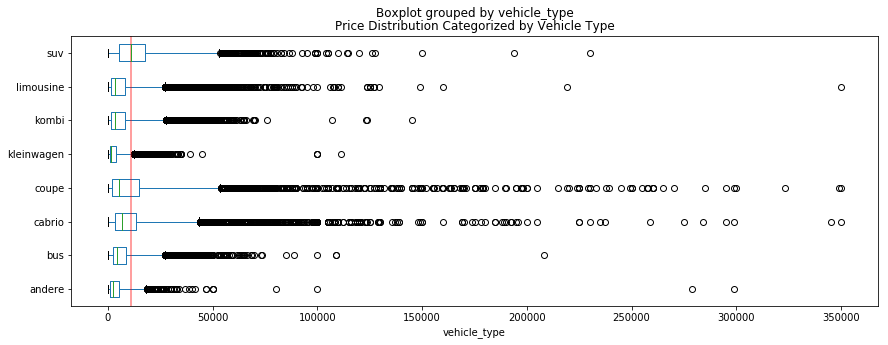

In [17]:
autos.boxplot('price', by='vehicle_type', vert=False, figsize=(14,5), whis=3, grid=False)
plt.axvline(10800, alpha=0.5, c='red')
plt.title('Price Distribution Categorized by Vehicle Type')

CORRELATION BETWEEN **PRICE** AND **KILOMETER**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001657E470>,
      dtype=object)

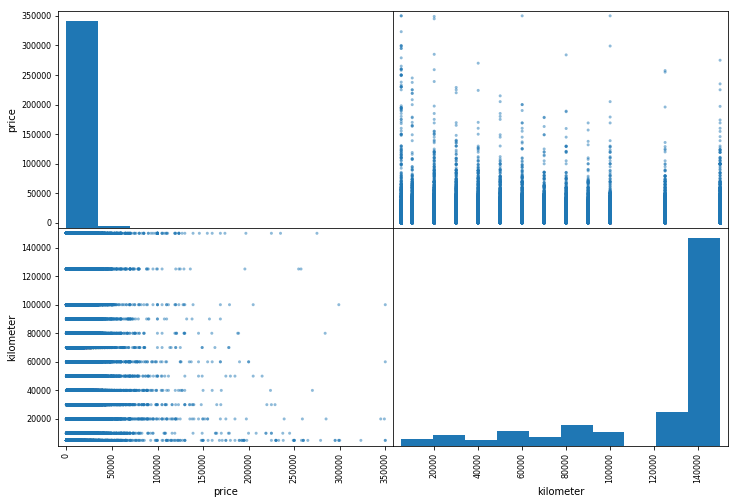

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(autos[['price','kilometer']], figsize=(12,8))

In [19]:
brand_series = autos['brand'].value_counts(normalize=True)[:10]*100
brand_series

volkswagen       21.170084
bmw              10.987166
opel             10.641005
mercedes_benz     9.684156
audi              8.954333
ford              6.891787
renault           4.751644
peugeot           3.015355
fiat              2.569095
seat              1.866099
Name: brand, dtype: float64

*---> We only aggregate the brands that have the percentages >5%*

In [20]:
common_brand = brand_series[brand_series>5].index
common_brand

Index([u'volkswagen', u'bmw', u'opel', u'mercedes_benz', u'audi', u'ford'], dtype='object')

### **1. EXPLORE PRICES BY BRAND**

In [21]:
# Compare the price of cars categorized by brand
brand_mean_price = {}
for brand in common_brand:
    mean_price = autos.loc[autos['brand']==brand,'price'].mean()
    brand_mean_price[brand] = mean_price
brand_mean_price

{u'audi': 9086.279597951097,
 u'bmw': 8449.121823146397,
 u'ford': 3696.4059687748527,
 u'mercedes_benz': 8551.650114682316,
 u'opel': 2971.8999132509216,
 u'volkswagen': 5400.188763830599}

**'Volkswagen' is the 'best of both world' option. That's why it's the most popular brand (over 22%)**

In [22]:
# Compare the mileage of cars categorized by brand
brand_mean_mileage = {}
for brand in common_brand:
    mean_mileage = autos.loc[autos['brand']==brand, 'kilometer'].mean()
    brand_mean_mileage[brand] = mean_mileage
brand_mean_mileage

{u'audi': 129443.9612125898,
 u'bmw': 132800.0945179584,
 u'ford': 123662.25775396593,
 u'mercedes_benz': 130572.96476125227,
 u'opel': 128722.61982216439,
 u'volkswagen': 128386.04403989753}

In [23]:
#Create a dataframe to see the correlation between 'price' & 'mileage'
bmp_series = pd.Series(brand_mean_price).sort_values(ascending=False)
bmm_series = pd.Series(brand_mean_mileage).sort_values(ascending=False)

In [24]:
pd.DataFrame(bmp_series, columns=['mean_price'])

,mean_price
audi,9086.279598
mercedes_benz,8551.650115
bmw,8449.121823
volkswagen,5400.188764
ford,3696.405969
opel,2971.899913


In [25]:
pd.DataFrame(bmm_series, columns=['mean_mileage'])

,mean_mileage
bmw,132800.094518
mercedes_benz,130572.964761
audi,129443.961213
opel,128722.619822
volkswagen,128386.044040
ford,123662.257754


In [26]:
brand_info = pd.DataFrame(bmp_series, columns=['mean_price'])
brand_info['mean_mileage'] = bmm_series
brand_info

,mean_price,mean_mileage
audi,9086.279598,129443.961213
mercedes_benz,8551.650115,130572.964761
bmw,8449.121823,132800.094518
volkswagen,5400.188764,128386.044040
ford,3696.405969,123662.257754
opel,2971.899913,128722.619822


**--> There's actually no correlation between those 2 features**

### **OTHER TASKS TO DO WITH THE DATASET**

#Identify categorical data that uses german words, translate them and map the values to their english counterparts
#Convert the dates to be uniform numeric data, so "2016-03-21" becomes the integer 20160321
#See if there are particular keywords in the name column that you can extract as new columns
#Find the most common brand/model combinations
#Split the odometer_km into groups, and use aggregation to see if average prices follows any patterns based on the milage.
#How much cheaper are cars with damage than their non-damaged counterparts?

In [32]:
autos['date_crawled'] = autos['date_crawled'].astype(str).str[:10]
autos['date_crawled'][:10]

0     2016-03-24
1     2016-03-24
2     2016-03-14
3     2016-03-17
4     2016-03-31
5     2016-04-04
6     2016-04-01
8     2016-04-04
9     2016-03-17
10    2016-03-26
Name: date_crawled, dtype: object

In [33]:
#Convert the dates to be uniform numeric data
autos.info()
#There're 3 columns that have values as dates: 'date_crawled', 'ad_created', 'last_seen'
autos['date_crawled_uniform'] = autos['date_crawled'].astype(str).str[:10].str.split('-')
autos['date_crawled_uniform'] = (autos['date_crawled_uniform'].str[0] + autos['date_crawled_uniform'].str[1] + autos['date_crawled_uniform'].str[2]).astype(int)

autos['ad_created_uniform'] = autos['ad_created'].astype(str).str[:10].str.split('-')
autos['ad_created_uniform'] = (autos['ad_created_uniform'].str[0] + autos['ad_created_uniform'].str[1] + autos['ad_created_uniform'].str[2]).astype(int)

autos['last_seen_uniform'] = autos['last_seen'].astype(str).str[:10].str.split('-')
autos['last_seen_uniform'] = (autos['last_seen_uniform'].str[0] + autos['last_seen_uniform'].str[1] + autos['last_seen_uniform'].str[2]).astype(int)

autos.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346659 entries, 0 to 371527
Data columns (total 21 columns):
date_crawled          346659 non-null object
name                  346659 non-null object
seller                346659 non-null object
offer_type            346659 non-null object
price                 346659 non-null int64
ab_test               346659 non-null object
vehicle_type          326520 non-null object
registration_year     346659 non-null int64
gear_box              330736 non-null object
power_ps              346659 non-null int64
model                 330308 non-null object
kilometer             346659 non-null int64
registration_month    346659 non-null int64
fuel_type             322103 non-null object
brand                 346659 non-null object
unrepaired_damage     285955 non-null object
ad_created            346659 non-null datetime64[ns]
num_photos            346659 non-null int64
postal_code           346659 non-null int64
last_seen             346659 non-

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen,exist_day,date_crawled_uniform,ad_created_uniform,last_seen_uniform
0,2016-03-24,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57,13,20160324,20160324,20160407
1,2016-03-24,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50,13,20160324,20160324,20160407
2,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46,21,20160314,20160314,20160405


In [36]:
#See if there are particular keywords in the name column that we can extract as new columns
#Brand name is at the start (before the '_')
autos['name'].str.split('_')[:10]

0                                        [Golf, 3, 1.6]
1                             [A5, Sportback, 2.7, Tdi]
2                   [Jeep, Grand, Cherokee, "Overland"]
3                             [GOLF, 4, 1, 4, , 3TÜRER]
4                 [Skoda, Fabia, 1.4, TDI, PD, Classic]
5     [BMW, 316i, , , e36, Limousine, , , Bastlerfah...
6                     [Peugeot, 206, CC, 110, Platinum]
8       [Ford, C, , , Max, Titanium, 1, 0, L, EcoBoost]
9     [VW, Golf, 4, 5, tuerig, zu, verkaufen, mit, A...
10                               [Mazda, 3, 1.6, Sport]
Name: name, dtype: object

In [37]:
#Find the most common brand/model combinations
autos.loc[autos['model'].isnull(),'model'] = 'Unknown'
autos['brand_model'] = autos['brand'] + '_' + autos['model']
autos['brand_model'].value_counts(normalize=True).sort_values(ascending=False)[:10]

volkswagen_golf           0.079464
bmw_3er                   0.056165
volkswagen_polo           0.034769
opel_corsa                0.033457
opel_astra                0.028974
audi_a4                   0.028270
volkswagen_passat         0.028045
mercedes_benz_c_klasse    0.024358
bmw_5er                   0.023672
mercedes_benz_e_klasse    0.020946
Name: brand_model, dtype: float64

**We can see that *Volswagen_gold* is the most common model that is sold on Amazon. Also, *Volswagen* particularly constitues over 10% of the car market on this platform.**

In [38]:
#Split the 'kilometer' into groups, and use aggregation to see if average prices follows any patterns based on the milage.
autos['kilometer'].value_counts(normalize=True)
km_price = {}

km_price['150000'] = autos.loc[autos['kilometer']==150000, 'price'].mean()
km_price['90000 - 125000'] = autos.loc[autos['kilometer'].between(90000,125000), 'price'].mean()
km_price['50000 - 80000'] = autos.loc[autos['kilometer'].between(50000,80000), 'price'].mean()
km_price['<50000'] = autos.loc[autos['kilometer']<=40000, 'price'].mean()
km_price_sr = pd.Series(km_price).sort_values(ascending=False)
km_price_df = pd.DataFrame(km_price_sr, columns=['Average_price'])
print(km_price_df)

km_price_1 = {}
for each in autos['kilometer'].unique():
    mean_price = autos.loc[autos['kilometer']==each,'price'].mean()
    km_price_1[each] = mean_price
km_price_series = pd.Series(km_price_1).sort_values(ascending=False)
km_price_dataframe = pd.DataFrame(km_price_series, columns=['average_price'])
km_price_dataframe

                Average_price
<50000           14952.008758
50000 - 80000    11381.901409
90000 - 125000    7155.828796
150000            3799.633958


,average_price
10000,21887.502521
20000,17356.608566
30000,16068.099638
40000,15189.329792
50000,13473.143905
60000,12138.998459
70000,10976.783792
80000,9690.372974
5000,9024.498752
90000,8678.521565


**--> We can see that the correlation between mileage & price are negative. That means the longer (& further, of course) the car was used, the lower the price.**

*Only average price of cars that used for 5,000 km is unique (mean price is lower than 80,000 km's)*

In [39]:
#How much cheaper are cars with damage than their non-damaged counterparts?
mean_price_new = autos.loc[autos['unrepaired_damage']=='nein','price'].mean()
mean_price_old = autos.loc[autos['unrepaired_damage']=='ja','price'].mean()
print('Mean price of new cars:', mean_price_new)
print('Mean price of old cars:', mean_price_old)

('Mean price of new cars:', 7145.773392096278)
('Mean price of old cars:', 2236.730776184163)


In [40]:
# Difference between old cars & new cars categorized by common brands
brand_price_old = {}
brand_price_new = {}
brand_price_diff = {}
for brand in common_brand:
    mean_old = autos.loc[(autos['brand']==brand) & (autos['unrepaired_damage']=='ja'), 'price'].mean()
    mean_new = autos.loc[(autos['brand']==brand) & (autos['unrepaired_damage']=='nein'), 'price'].mean()
    price_diff = mean_new - mean_old
    brand_price_old[brand] = mean_old
    brand_price_new[brand] = mean_new
    brand_price_diff[brand] = price_diff
bpo_series = pd.Series(brand_price_old).sort_values(ascending=False)
bpn_series = pd.Series(brand_price_new).sort_values(ascending=False)
bpd_series = pd.Series(brand_price_diff)
bp_df = pd.DataFrame(bpo_series, columns=['Old_cars_prices'])
bp_df['New_cars_prices'] = bpn_series
bp_df['Price_difference'] = bpd_series
bp_df = bp_df.sort_values('Price_difference', ascending=False)
bp_df

,Old_cars_prices,New_cars_prices,Price_difference
audi,3419.606037,10576.613830,7157.007793
mercedes_benz,3749.299121,9670.552214,5921.253093
bmw,3660.239721,9571.392981,5911.153260
volkswagen,2223.407764,6413.682106,4190.274342
ford,1361.901272,4585.775586,3223.874314
opel,1251.970283,3639.082729,2387.112446
